In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from collections import deque
import random

# CREACIÓN DEL LABERINTO

In [2]:
#Hay que crear tanto la Celdas como la Cola donde se va a almacenar dichas celdas
class Queue:
  def __init__(self):
    self.queue = []

  def add(self, celda):
    self.queue.append(celda)
    
  def get(self):
    return self.queue.pop(0)
  
  def mostrar(self):
    return self.queue

class Celda:
  def __init__(self, row, column):
    self.row = row
    self.column = column

  #Este método por lo que vi, evita que el objeto celda se compare con otros
  def __com__(self, other): 
    if not isinstance(other, Celda):
      return NotImplemented
    return self.row == other.row and self.column == other.column

In [3]:
move=np.zeros((4,2),dtype=int)
"""Arriba"""
move[0,0]=-1
move[0,1]=0
"""Abajo"""
move[1,0]=1
move[1,1]=0
"""Derecha"""
move[2,0]=0
move[2,1]=1
"""Izquierda"""
move[3,0]=0
move[3,1]=-1


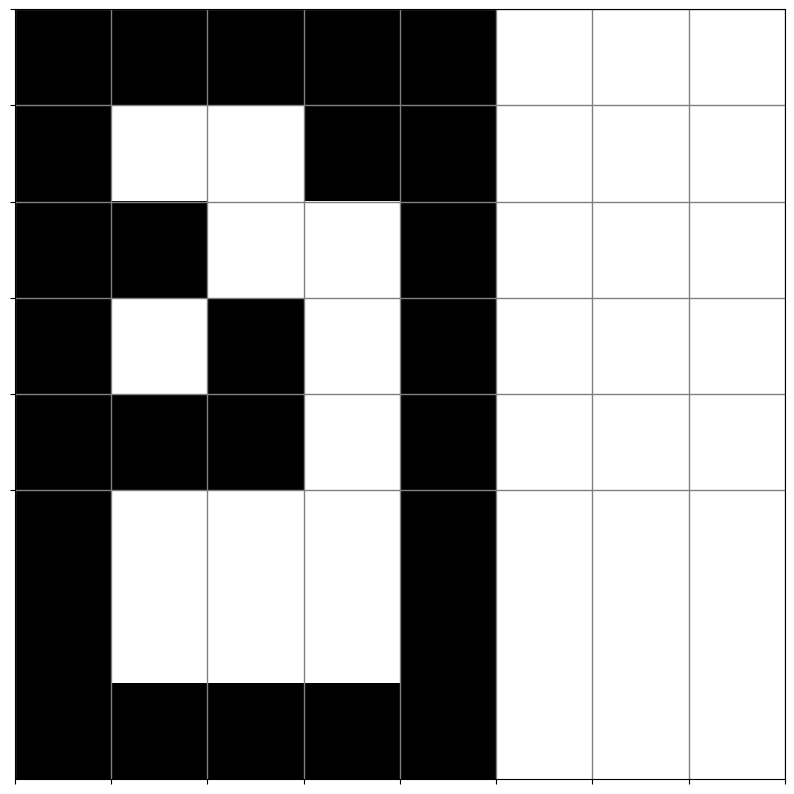

In [4]:
# Definir el tamaño del laberinto
n = 10
ANCHO = 8
ALTO = 5

def generate_maze():
    maze = np.zeros((ANCHO, ALTO), dtype=int)
    height, width = maze.shape

    maze[np.random.rand(height, width) < 0.4] = 1

    for x in range(height):
        maze[x, 0] = 1
        maze[x, width - 1] = 1

    for x in range(width):
        maze[0, x] = 1
        maze[height - 1, x] = 1

    queue = Queue()
    # Se le añade el primer valor
    queue.add(Celda(1, 1))
    mark = np.zeros((n, n), dtype=int)
    end = False

    while not end:
        if len(queue.mostrar()) == 0:
            return None

        que = queue.get()

        if maze[que.row, que.column] == maze[ANCHO - 2, ALTO - 2] == 0:
            mark[que.row, que.column] = 3
            end = True
        else:
            if not end:
                for i in range(0, 4):
                    r = que.row + move[i, 0]
                    c = que.column + move[i, 1]
                    if (maze[r, c] != 1) and (mark[r, c] == 0):
                        mark[r, c] = 2
                        if Celda(r, c) not in queue.mostrar():
                            queue.add(Celda(r, c))

    return maze

maze = None
while maze is None or maze[1, 1] != 0 or maze[ANCHO - 2, ALTO - 2] != 0:
    maze = generate_maze()

# Create a figure to show the maze
fig, ax = plt.subplots(figsize=(10, 10))

# Show the maze as a binary image (white for paths, black for walls)
ax.imshow(maze, cmap='binary')

# Configure axis ticks
ax.set_xticks(np.arange(-0.5, ANCHO, 1))
ax.set_yticks(np.arange(-0.5, ALTO, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(color='gray', linestyle='-', linewidth=1)

# Show the maze figure
plt.show()

Generar un laberinto con solución.

# CREACIÓN DEL MODELO
- A la entrada se espera una lista anidada [[a,b]] que contiene a su vez otra lista (o más de una). La lista interior 
- [a,b] contiene dos elementos: el número a y el número b. Por ejemplo una posible entrada sería X_Train=[[1,1],[3,1],[2,2]].
- A la salida se esperan cuatro valores Q para las acciones up,right,down,left por ejemplo: [[-0.98110485 -0.6626471  -0.520256   -0.9996525 ]]
- Se ha escogido la función tangente hiperbólica por proporcionar valores entre -1 y +1 para determinar la calidad de las acciones y que no se propaguen valores demasiado grandes.

In [5]:
# Crear la red neuronal
model = Sequential()
model.add(Dense(32, activation='sigmoid', input_shape=(2,)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(4, activation='tanh'))
model.compile(loss='mse', optimizer=Adam(lr=0.003))

c:\Users\ruben\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# La siguiente función muestra la predicción del modelo para un estado

In [6]:
def g(x,y):
    X = np.array([[x,y]])      
    prediction=model.predict(X,verbose=0)
    #print(np.round(prediction*100)/100)
    print(prediction)

# Un pequeño truco es entrenar el modelo para que inicialmente todas las acciones sean malas.

In [7]:
target_q_values=(-1,-1,-1,-1) # muros
target_q_values=np.reshape(target_q_values, [1, 4]) 
for x in range(ANCHO):
    for y in range(ALTO):       
        state = (x,y)  
        state = np.reshape(state, [1, 2]) 
        
        model.fit(state, target_q_values, epochs=20, verbose=0)
        g(x,y)
        

[[-0.9471256  -0.9471784  -0.95769674 -0.9775322 ]]
[[-0.9734471  -0.9717098  -0.98469436 -0.9873342 ]]
[[-0.97941047 -0.9766607  -0.9878234  -0.9896211 ]]
[[-0.98323417 -0.9797123  -0.9894461  -0.99087244]]
[[-0.9860895  -0.9824989  -0.99081665 -0.9919395 ]]
[[-0.98103327 -0.98175824 -0.98947155 -0.99306136]]
[[-0.98545486 -0.984161   -0.9912418  -0.99354017]]
[[-0.9882608  -0.986039   -0.99241143 -0.9939776 ]]
[[-0.990083   -0.98758507 -0.9932375  -0.9944077 ]]
[[-0.9912914  -0.9888804  -0.99385726 -0.99482477]]
[[-0.9889887  -0.98823744 -0.99348444 -0.9952974 ]]
[[-0.99124336 -0.98960835 -0.9944196  -0.9954948 ]]
[[-0.99251497 -0.9905952  -0.9949485  -0.995702  ]]
[[-0.99327445 -0.9913416  -0.9952731  -0.99591327]]
[[-0.99375844 -0.9919288  -0.99549127 -0.9961192 ]]
[[-0.9927691  -0.99159586 -0.99544674 -0.9963458 ]]
[[-0.99376106 -0.99225044 -0.995804   -0.9964437 ]]
[[-0.9943349  -0.99272776 -0.99600774 -0.9965592 ]]
[[-0.99468386 -0.993093   -0.9961307  -0.9966834 ]]
[[-0.9949111

# Definición de hiperparámetros 
- buffer_size define el tamaño del buffer de repetición para entrenar el modelo.
- gamma es el factor de descuento de la ecuación de Bellman para DQN
- epsilon inicialmente es uno para EXPLORAR
- epsilon_decay=0.8 para ir aumentando la EXPLOTACIÓN (ÉPSILON-GREEDY)
- goal_state es la Meta del laberinto
- reward_muro es -2 representa la penalización por chocar contra una pared
- reward_paso es 0.7 puesto que es positivo no chocar (aunque no vaya en la dirección correcta)

In [8]:
# Definir hiperparámetros
buffer_size = 20
gamma = 0.95
epsilon = 1.0
epsilon_decay = 0.8
epsilon_min = 0.1
#goal_state=[3,3]
goal_state=[ANCHO-2,ALTO-2]
reward_goal=5
reward_muro=-2
reward_paso=0.7

# Buffer de repetición
- Se define el buffer como una cola.
- X_Train e Y_Train se rellenarán a partir de los datos del buffer donde se almacena las experiencias del agente.

In [9]:
# Inicializar el búfer de repetición
replay_buffer = deque(maxlen=buffer_size) 
X_Train = np.zeros((buffer_size,2))
X_Train = np.reshape(X_Train, [buffer_size, 2])
Y_Train= np.zeros((buffer_size,4))
Y_Train = np.reshape(Y_Train, [buffer_size, 4])

# Épsilon greedy
- Exploración vs Explotación a medida que épsilon disminuye hasta un mínimo.

In [10]:
# Función para elegir una acción epsilon-greedy
def epsilon_greedy(state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(4) # número aleatorio 0,1,2, ó 3
    else:
        q_values = model.predict(state)
        return np.argmax(q_values[0]) # mejor acción para la red

# Realización de la acción 
- Se realiza la acción desde el estado dado y el entorno devuelve la recompensa inmediata, el siguiente estado y done que será true si se ha alcanzado la meta o chocado con una pared, o false si se ha transitado a otro estado correctamente.

In [11]:
def take_action(state, action):
    salto=["up","right","down","left"]
    next_state = list(state)
    if action == 0:  # up
        next_state[0] -= 1
    if action == 1:  # right  
        next_state[1] += 1
    if action == 2:  # down
        next_state[0] += 1
    if action == 3:  # left
        next_state[1] -= 1    
    next_state = tuple(next_state)
    reward = reward_paso  
    done = False
    
    if ((next_state[0] == goal_state[0]) and (next_state[1] == goal_state[1])):
        reward = reward_goal
        done = True
        #print("Meta")
    if ((next_state[0] <= 0) or (next_state[0] >= ANCHO - 1)  or (next_state[1] <= 0) or (next_state[1] >= ALTO - 1)):
        #print("Borde")
        reward=reward_muro
        done=True 
    else:
        if maze[next_state[0]][next_state[1]] == 1:  # Colisión con pared   
            #print("Pared")
            reward=reward_muro
            done = True
    
    return state,reward,next_state, done

# Evitamos almacenar varias veces el mismo estado-acción en el buffer

In [12]:
#from sklearn.preprocessing import StandardScaler
def encontrado(state1_x,state1_y,action1):
    found=False
    for state_x,state_y,action,next_state_x,next_state_y,reward,done in replay_buffer:
        if ((state_x==state1_x) and (state_y==state1_y) and (action==action1)):
            found=True
            break
    return found
    

# ENTRENAMIENTO

In [13]:
# Entrenamiento del agente DQN
start_state = (1, 1)
state = start_state  
state = np.reshape(state, [1, 2])
k=1
for ciclos in range(1):
    #print(1-ciclos)
    #start_state = (1, 1)
    #state = start_state  
    #state = np.reshape(state, [1, 2])
    num_episodes = 1000
   #replay_buffer.clear() nunca la borramos porque se va actualizando
    for episode in range(num_episodes): 
        done = False
        total_reward = 0
        salto=["up","right","down","left"]
        long=1
       
        while not done:  
            action = epsilon_greedy(state, epsilon)   
            #print(long,state,salto[action],"->", end="")
            long+=1
            state,reward,next_state,done=take_action(state[0], action)    
            state = np.reshape(state, [1, 2])        
            # se almacena en el buffer si no pared y no es la meta ni borde
            state_x=state[0][0]
            state_y=state[0][1]  
            next_state_x=next_state[0]
            next_state_y=next_state[1]  
            if (not (encontrado(state_x,state_y,action))):
                replay_buffer.append((state_x,state_y,action,next_state_x,next_state_y,reward,done))
                print(k," Almacenado:","[",state_x,",",state_y,"]",action,"->[",next_state_x,",",next_state_y,"]",reward,done)
                k+=1
            next_state = np.reshape(next_state, [1, 2])
            #print(next_state,reward)
            if ((next_state[0][0] > 0) and (next_state[0][0] < ANCHO - 1)  and (next_state[0][1] > 0) and (next_state[0][1] < ALTO - 1)):
                if maze[next_state[0][0]][next_state[0][1]] != 1:
                    state[0][0]=next_state[0][0] # se actualiza el estado actual 
                    state[0][1]=next_state[0][1] 
            
            if len(replay_buffer) >=buffer_size:
                m=1
                k=0 # para contar los que se almacenan
                for state_x,state_y,action,next_state_x,next_state_y,reward,done in replay_buffer:   
                    
                    
                    state = np.reshape(state, [1, 2])
                    next_state = np.reshape(next_state, [1, 2])
                    state[0][0]=state_x
                    state[0][1]=state_y   
                    next_state[0][0]=next_state_x
                    next_state[0][1]=next_state_y
                    if ((next_state[0][0] == goal_state[0]) and (next_state[0][1] == goal_state[1])): # META
                        target = reward_goal # si se alcanzó la meta                   
                    else:
                        target=reward_muro # PARED
                        if not done: # no se alcanzó la meta ni borde ni pared
                             if ((next_state[0][0] > 0) and (next_state[0][1] < ANCHO - 1)  and (next_state[0][1] > 0) and (next_state[0][1] < ALTO - 1)):
                                if maze[next_state[0][0]][next_state[0][1]] == 0:                      
                                    q_values = model.predict(next_state)
                                    target = reward + gamma * np.max(q_values[0])
                                    print("***","state",state,"action",action,"next_state",next_state,"target",target)
                        target_q_values = model.predict(state)                 
                    target_q_values[0][action] = target  
                    #if ((state[0][0] == goal_state[0]) and (state[0][1] == goal_state[1])):
                          #target_q_values[0]=[0,0,0,0]
                    #print(target_q_values)
                    #scaler = StandardScaler()
                    #data_transformed = scaler.fit_transform(target_q_values)
                    
                    #model.fit(state, data_transformed , epochs=50, verbose=0)
                    X_Train[k]=[state[0][0],state[0][1]]
                    Y_Train[k]=[target_q_values[0][0],target_q_values[0][1],target_q_values[0][2],target_q_values[0][3]]
                    k+=1
                    #model.fit(state, target_q_values , epochs=10, verbose=0)
                    #print(" Entrenado:",epsilon,state,action,"->",next_state,end="")
                    #g(state[0][0],state[0][1])
                model.fit(X_Train, Y_Train , epochs=100, verbose=1)   
                replay_buffer.clear()
                epsilon = max(epsilon_min, epsilon * epsilon_decay)   
    
        

1  Almacenado: [ 1 , 1 ] 2 ->[ 2 , 1 ] -2 True
2  Almacenado: [ 1 , 1 ] 1 ->[ 1 , 2 ] 0.7 False
3  Almacenado: [ 1 , 2 ] 2 ->[ 2 , 2 ] 0.7 False
4  Almacenado: [ 2 , 2 ] 2 ->[ 3 , 2 ] -2 True
5  Almacenado: [ 2 , 2 ] 3 ->[ 2 , 1 ] -2 True
6  Almacenado: [ 2 , 2 ] 1 ->[ 2 , 3 ] 0.7 False
7  Almacenado: [ 2 , 3 ] 1 ->[ 2 , 4 ] -2 True
8  Almacenado: [ 2 , 3 ] 3 ->[ 2 , 2 ] 0.7 False
9  Almacenado: [ 2 , 2 ] 0 ->[ 1 , 2 ] 0.7 False
10  Almacenado: [ 1 , 2 ] 3 ->[ 1 , 1 ] 0.7 False
11  Almacenado: [ 1 , 1 ] 0 ->[ 0 , 1 ] -2 True
12  Almacenado: [ 1 , 2 ] 1 ->[ 1 , 3 ] -2 True
13  Almacenado: [ 1 , 1 ] 3 ->[ 1 , 0 ] -2 True
14  Almacenado: [ 1 , 2 ] 0 ->[ 0 , 2 ] -2 True
15  Almacenado: [ 2 , 3 ] 0 ->[ 1 , 3 ] -2 True
16  Almacenado: [ 2 , 3 ] 2 ->[ 3 , 3 ] 0.7 False
17  Almacenado: [ 3 , 3 ] 3 ->[ 3 , 2 ] -2 True
18  Almacenado: [ 3 , 3 ] 2 ->[ 4 , 3 ] 0.7 False
19  Almacenado: [ 4 , 3 ] 3 ->[ 4 , 2 ] -2 True
20  Almacenado: [ 4 , 3 ] 1 ->[ 4 , 4 ] -2 True
1/1 [============================

# Muestra las acciones desde cada estado
- 0 Up
- 1 Right
- 2 Down
- 3 Left

In [14]:
for a in range(ANCHO):
    for b in range(ALTO):
        X_pred3 = np.array([[a,b]])      
        prediction3=model.predict(X_pred3,verbose=0) 
        if (maze[a,b]!=1):
            print(np.argmax(prediction3), end=' ')
        else:
            print("x", end=' ')
    print("")

x x x x x 
x 2 2 x x 
x x 2 2 x 
x 1 x 2 x 
x x x 2 x 
x 1 1 2 x 
x 1 1 3 x 
x x x x x 


# Muetra los valores Q para cada estado

In [15]:
for x in range(ANCHO):
    for y in range(ALTO):
        if (maze[x,y]!=1):
            print(x,y,"->",end="")
            g(x,y)

1 1 ->[[ 0.413512   -0.99999666  0.9850302  -0.17288697]]
1 2 ->[[ 0.6042466  -1.          0.99973506 -0.40652862]]
2 2 ->[[ 0.60677004 -1.          0.9995374  -0.29265893]]
2 3 ->[[ 0.63658607 -1.          0.99985796 -0.41521522]]
3 1 ->[[-0.48375827  0.9840398  -0.99972016  0.5854378 ]]
3 3 ->[[ 0.6543928 -1.         0.999824  -0.33807  ]]
4 3 ->[[ 0.66693705 -1.          0.9995609  -0.09887924]]
5 1 ->[[-0.6554461   0.9997914  -0.9999842  -0.11864704]]
5 2 ->[[-0.21850236  0.93410534 -0.99946374  0.92716944]]
5 3 ->[[ 0.630257   -0.99999785  0.98358214  0.61621976]]
6 1 ->[[-0.6800788   0.99988997 -0.9999885  -0.39823055]]
6 2 ->[[-0.3674916   0.99535984 -0.99991614  0.8740394 ]]
6 3 ->[[ 0.31418628 -0.9482428  -0.9212819   0.9595956 ]]


2.Entrena el modelo para un laberinto de 8x5 y muestra las acciones
desde cada estado indicando:

2.1. (1 Punto) ¿Cuántos estados posibles P (casillas en blanco accesibles
desde [1,1]) hay?
EP

2.2. (1 Punto) ¿Cuántas acciones no chocan contra muros N y cuántas sí S
? Indícalo también en porcentaje así (N/ (S+N))*100

2.3. (1 Punto) ¿Cuántas acciones son correctas X? (conducen a la solución)
indícalo también en porcentaje así (X/4*P)*100

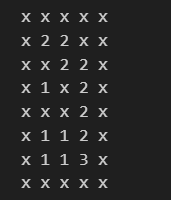

**2.1.**

Unicamente hay un estado posible.

**2.2.**

3 chocan contra la pared. (12/(3+12))*100 = 46 % no choca.

**2.3.**

5 acciones son correctas.


3 (4 Puntos) Indica cómo crees que se podrían mejorar los resultados
obtenidos. Puedes responder afirmativamente o negativamente a las
siguientes cuestiones señalando los motivos.

1. ¿Qué hiperparámetros modificarías?.

2. ¿Pondrías algún tipo de regularización?

3. ¿Cambiarías el optimizador o alguno de sus parámetros como el learning rate?.

4. ¿Cambiarías las funciones de activación de las capas?

5. ¿Cambiarías el modelo por otro tipo?


1. 



2. 



3. 



4. 



5. 


